Paso 1: Número de infectados = 1


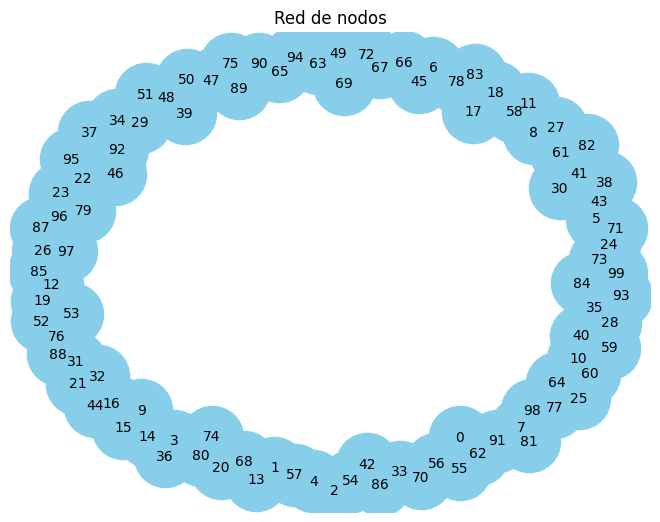

Paso 2: Número de infectados = 1


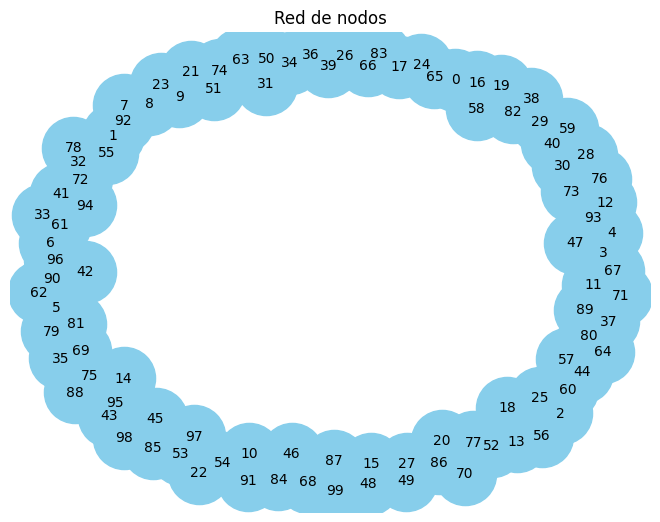

Paso 3: Número de infectados = 3


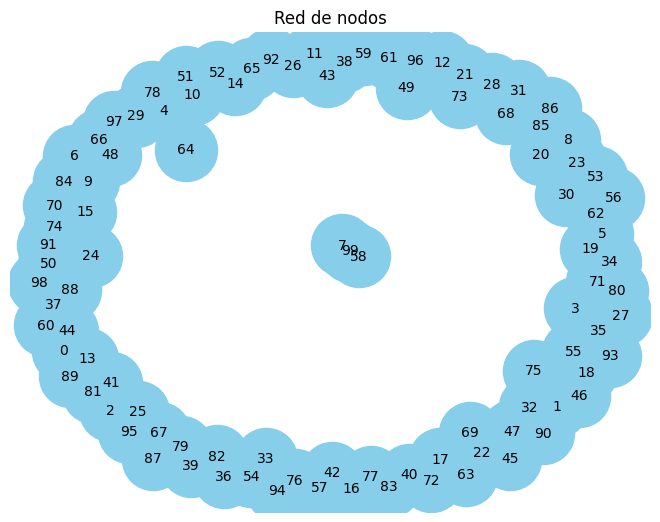

Paso 4: Número de infectados = 4


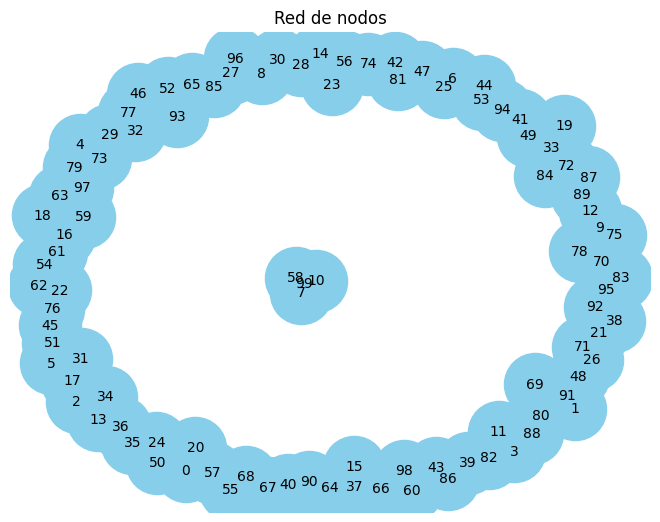

Paso 5: Número de infectados = 7


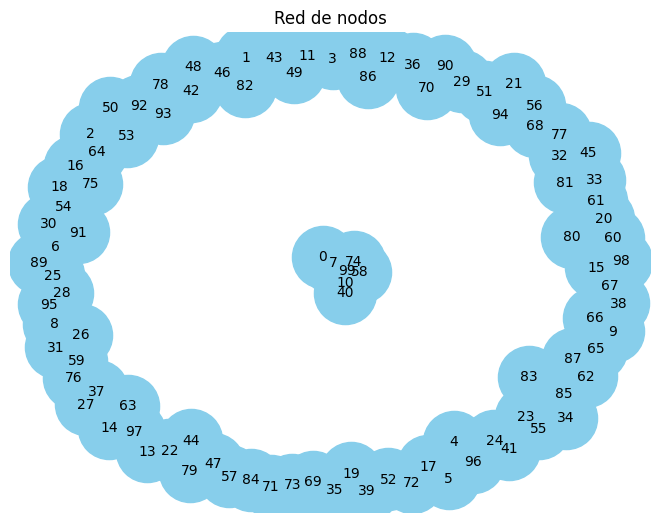

Paso 6: Número de infectados = 12


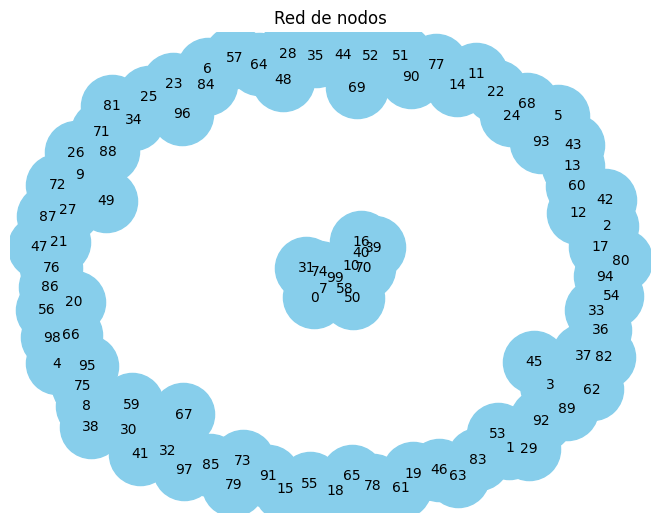

Paso 7: Número de infectados = 21


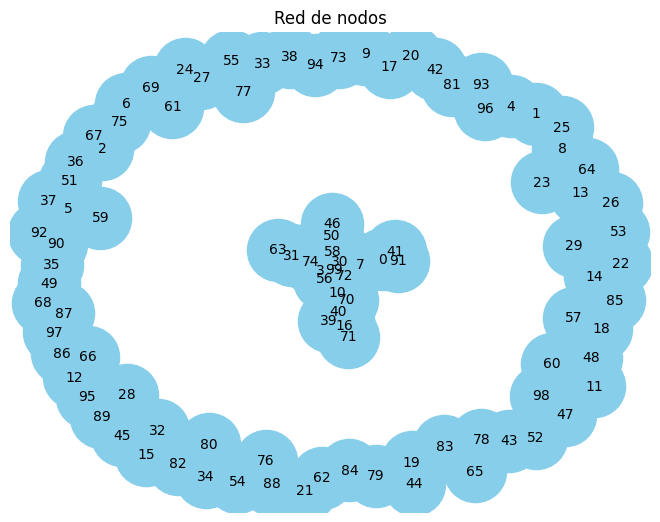

Paso 8: Número de infectados = 36


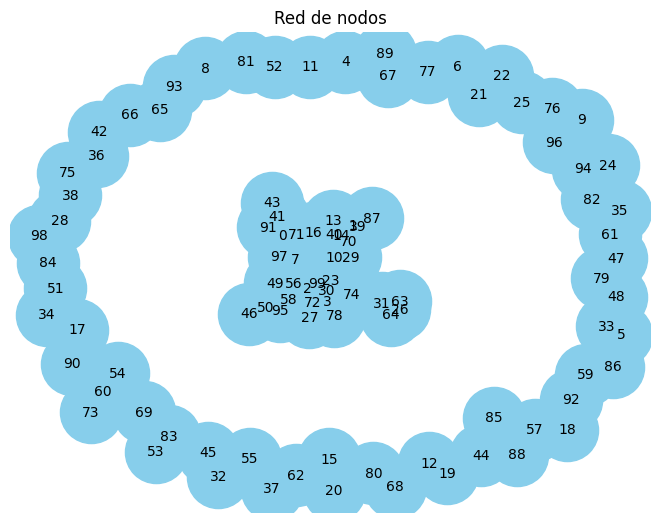

Paso 9: Número de infectados = 56


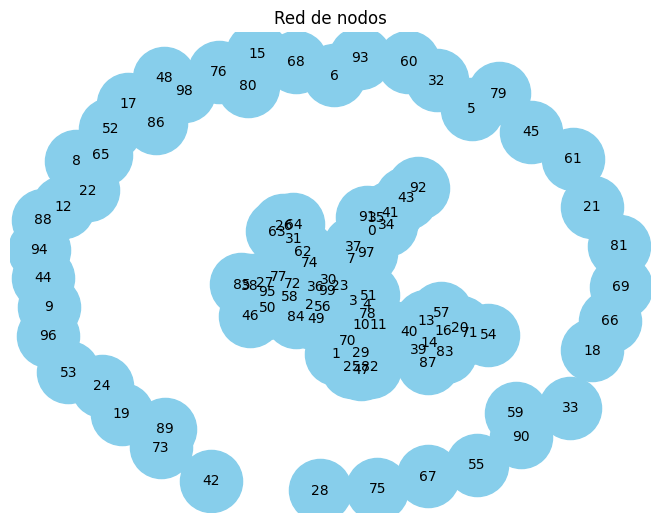

Paso 10: Número de infectados = 79


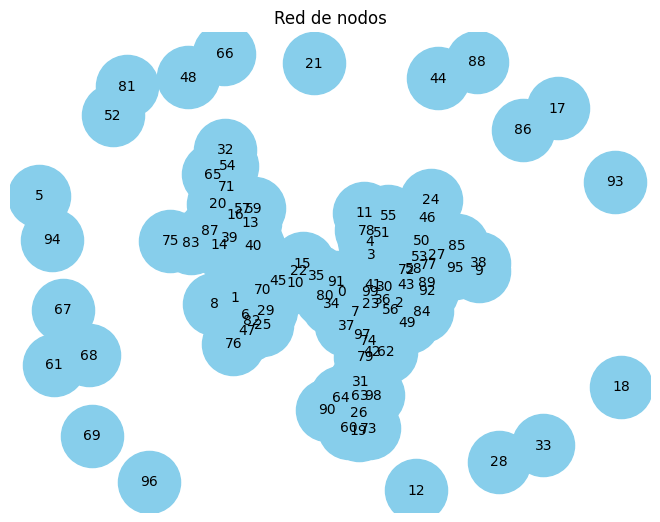

Simulación finalizada.


In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt

class Nodo:
    def __init__(self, id):
        self.id = id
        self.infectado = False

    def infectar(self):
        self.infectado = True

    def esta_infectado(self):
        return self.infectado

class Red:
    def __init__(self, n):
        self.nodos = [Nodo(i) for i in range(n)]
        # Elegir un nodo al azar para infectarlo inicialmente
        nodo_inicial = random.choice(self.nodos)
        nodo_inicial.infectar()

        # Crear el grafo
        self.grafo = nx.Graph()
        for nodo in self.nodos:
            self.grafo.add_node(nodo.id)

    def conectar_nodos(self, nodo1, nodo2):
        self.grafo.add_edge(nodo1.id, nodo2.id)

    def propagar_infeccion_pull(self):
        infectados = [nodo for nodo in self.nodos if nodo.esta_infectado()]
        for nodo in infectados:
            # Simulamos el proceso de "pull" donde un nodo infectado busca infectar a otros nodos
            vecinos = random.sample(self.nodos, min(5, len(self.nodos)))  # Escoger hasta 5 vecinos al azar
            for vecino in vecinos:
                if not vecino.esta_infectado():
                    probabilidad_infeccion = 0.2  # Probabilidad de infección
                    if random.random() < probabilidad_infeccion:
                        vecino.infectar()
                        self.conectar_nodos(nodo, vecino)

    def contar_infectados(self):
        return sum(1 for nodo in self.nodos if nodo.esta_infectado())

    def dibujar_red(self):
        pos = nx.spring_layout(self.grafo)
        nx.draw(self.grafo, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10)
        plt.title("Red de nodos")
        plt.show()

# Parámetros de la simulación
num_nodos = 100
num_pasos_simulacion = 10

# Crear red de nodos
red = Red(num_nodos)

# Simular la propagación de la infección
for paso in range(num_pasos_simulacion):
    red.propagar_infeccion_pull()
    infectados = red.contar_infectados()
    print(f"Paso {paso + 1}: Número de infectados = {infectados}")

    # Dibujar la red en cada paso
    red.dibujar_red()

print("Simulación finalizada.")